<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Recommendations-and-Conclusions" data-toc-modified-id="Recommendations-and-Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Recommendations and Conclusions</a></span><ul class="toc-item"><li><span><a href="#Recommendation:-Using-Model-to-Predict-Trap-Area-to-Spray" data-toc-modified-id="Recommendation:-Using-Model-to-Predict-Trap-Area-to-Spray-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Recommendation: Using Model to Predict Trap Area to Spray</a></span></li><li><span><a href="#Recommendation:-Improving-Our-Model" data-toc-modified-id="Recommendation:-Improving-Our-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Recommendation: Improving Our Model</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

# Recommendations and Conclusions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
preds = pd.read_csv('./dataset/predict_prob.csv')
test = pd.read_csv('./dataset/test.csv')
train = pd.read_csv('./dataset/train_FE_nummoz.csv')

In [22]:
train.set_index('Date', inplace=True)

In [23]:
train.shape

(8475, 19)

In [24]:
preds.dtypes

PredProb        float64
Week_Of_Year      int64
dtype: object

In [25]:
preds['Trap'] = test['Trap']
preds['Date'] = test['Date']

In [26]:
preds['Date'] = pd.to_datetime(preds['Date'], format='%Y-%m-%d')

In [27]:
preds.set_index('Date', inplace=True)

## Recommendation: Using Model to Predict Trap Area to Spray

We propose that our model be used as such:
1. Looking at the general trend of predicted mosquito infection by WNV over all years in the Test Data set, we see that probability of infection increases dramatically from week 27, peaks at 33/34, and then decreases after that until the end of the scope of our data.
2. Our model predicts probability of WNV infection at a Trap level. Traps with the highest predicted probability will have pesticide spray intervention allocated first in its surrounding area starting from week 26/27 (coinciding with the expected appearance of the WNV for any given year) 
3. As many traps in high priority trap vicinities are decided in this way, with highest priority traps being sprayed first and as early as possible, starting from week 27 up to week 34.

In [28]:
train.groupby('week_of_year').sum()

,Latitude,Longitude,NumMosquitos,WnvPresent,year,month,day_in_month,dist_to_stat_1,dist_to_stat_2,"('CULEX ERRATICUS',)","('CULEX PIPIENS',)","('CULEX PIPIENS/RESTUANS',)","('CULEX RESTUANS',)","('CULEX SALINARIUS',)","('CULEX TARSALIS',)","('CULEX TERRITANS',)"
week_of_year,,,,,,,,,,,,,,,,
22,3389.194104,-7102.436131,230,0,162679,405,2293,24.621207,12.530106,0.0,4.0,41.0,36.0,0.0,0.0,0.0
23,14356.240696,-30083.940179,2184,0,689333,2058,1800,94.742445,49.441692,0.0,28.0,132.0,169.0,3.0,0.0,11.0
24,11845.209106,-24820.272188,3704,0,569139,1698,4076,79.069430,41.467897,0.0,14.0,128.0,136.0,3.0,0.0,2.0
25,12218.528269,-25606.697675,3211,0,587202,1752,6079,85.629658,43.756492,0.0,15.0,124.0,149.0,3.0,0.0,1.0
26,17079.648335,-35784.685312,6576,1,820054,2448,11243,111.651925,60.420182,0.0,17.0,180.0,195.0,5.0,0.0,11.0
27,3559.492961,-7455.562856,1143,0,170617,584,467,22.301581,13.844409,0.0,3.0,43.0,36.0,3.0,0.0,0.0
28,34360.149350,-71999.897973,14035,7,1650555,5747,8837,234.704113,118.603192,0.0,64.0,366.0,355.0,11.0,0.0,25.0
29,19454.518974,-40774.122203,8970,15,934415,3255,8180,140.628089,71.113382,0.0,81.0,199.0,171.0,9.0,0.0,5.0
30,23734.665732,-49729.506615,11362,16,1139955,3969,14718,155.472521,81.565683,0.0,80.0,255.0,211.0,5.0,0.0,16.0


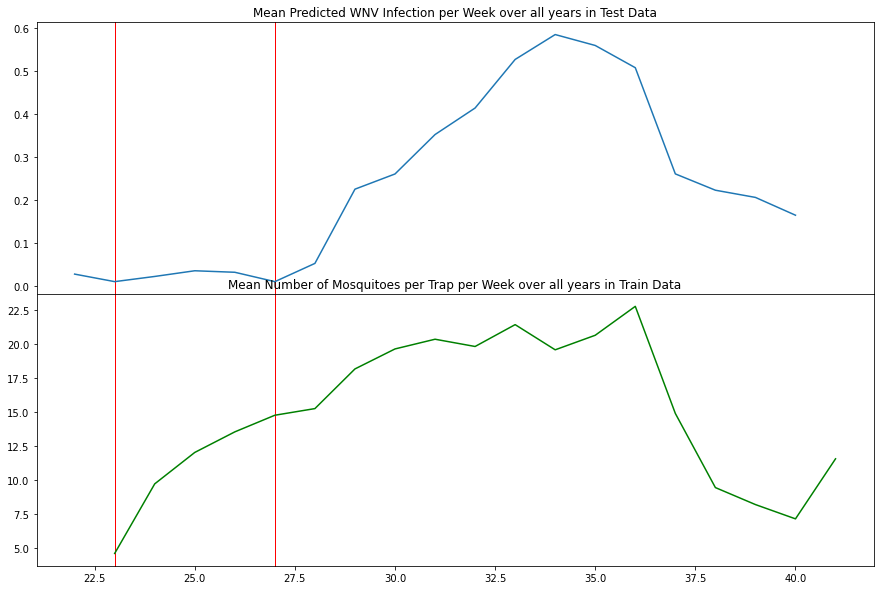

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,10))
fig.subplots_adjust(hspace=0)
ax1.set_title('Mean Predicted WNV Infection per Week over all years in Test Data')
ax1.plot(preds.groupby('Week_Of_Year').mean()['PredProb'])
ax2.set_title('Mean Number of Mosquitoes per Trap per Week over all years in Train Data')
ax2.plot(train.groupby('week_of_year').mean()['NumMosquitos'].rolling(2).mean(), c='g')
for x in [23, 27]:
    ax1.axvline(x=x,ymin=0,ymax=1,c="red",linewidth=1,zorder=0, clip_on=False)
    ax2.axvline(x=x,ymin=0,ymax=1,c="red",linewidth=1, zorder=0,clip_on=False)
plt.show();

Worked example: Which area around traps do we begin spraying at first?

Let us have a look at which Trap has the highest mean probability in Week 26 in 2008.

In [11]:
preds.loc['2008'].groupby(['Week_Of_Year', 'Trap']).mean().loc[26].sort_values(by='PredProb', ascending=False)

,PredProb
Trap,
T151,0.108706
T073,0.099468
T001,0.096404
T044,0.093003
T002A,0.082503
...,...
T107,0.007939
T033,0.007158
T221,0.006015


Our model predicts that T151 will have the highest probability of finding a WNV infected mosquito pool. We will start with this trap, followed by T073 and T001 -- on and on as budget allows. We will then do the same for subsequent weeks up till week 34.

Should we have simply chosen to spray all traps, we would have spent upwards of USD 10,000 * 149 Traps to spray 149 distinct areas in Chicago for a cost of ~ USD 149,000. Our model helps reduce this by identifying the highest priority trap areas.

## Recommendation: Improving Our Model

Unfortunately, our trap location-based features were not able to contribute to the effectiveness of our chosen best model as much as we expected. We expect that our next model will include a study of demographic and geographical features around each trap to attempt to glean patterns which would assist us in broadly grouping our Traps to make more effective predictive features.

We will also attempt to include weather data from months before May as conditions in Winter and Spring may inform us more about the mosquito population to expect in the summer for a given year.

## Conclusion

In this project, we first determined that our data was seasonal in nature which allowed us to create appropriate features to predict the prescence of WNV in mosquito pools in weeks in a year. Our best model was chosen by looking at 1) the highest Sensitivity (minimum/0 False Negatives) for 2) a as high as possible Precision (minimum False Positives). This was determined through evaluation through a Sensitivity-Precision curve after fitting.

Our model allows us to save on pesticide spraying costs, both financial and side effects, while helping us safely identify all areas suspected to be infected mosquito hot spots.

We could improve our model through the use of data not available at this stage of the project.